In [3]:
from torchvision import transforms

net1_data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(64),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Grayscale(),
        transforms.ToTensor()
        
    ]),
    'val': transforms.Compose([
        transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
    
    'test': transforms.Compose([
        transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
}
%matplotlib inline

Creating Net1.
519
336
x:608	y:32	width:64	height:64	text:	confidence:-0.0006740225944668055	level:2	isAnnotation:True
x:608	y:32	width:64	height:64	text:	confidence:-0.0006740225944668055	level:2	isAnnotation:True
x:512	y:64	width:64	height:64	text:	confidence:-2.281107072121813e-06	level:2	isAnnotation:True
x:544	y:64	width:64	height:64	text:	confidence:-2.5909747591867927e-07	level:2	isAnnotation:True
x:608	y:64	width:64	height:64	text:	confidence:-1.9174614863004535e-05	level:2	isAnnotation:True
x:384	y:96	width:64	height:64	text:	confidence:-1.3820056210533949e-12	level:2	isAnnotation:True
x:416	y:96	width:64	height:64	text:	confidence:-0.0005035146023146808	level:2	isAnnotation:True
x:448	y:96	width:64	height:64	text:	confidence:-0.00010245954763377085	level:2	isAnnotation:True
x:480	y:96	width:64	height:64	text:	confidence:-5.493751586982398e-07	level:2	isAnnotation:True
x:512	y:96	width:64	height:64	text:	confidence:-1.1432402970967814e-05	level:2	isAnnotation:True
x:608	y:96	w

x:864	y:1088	width:64	height:64	text:	confidence:-1.0551559626037488e-12	level:2	isAnnotation:True
x:896	y:1088	width:64	height:64	text:	confidence:-1.7328056856058538e-07	level:2	isAnnotation:True
x:384	y:1120	width:64	height:64	text:	confidence:-1.3062805010122247e-05	level:2	isAnnotation:True
x:416	y:1120	width:64	height:64	text:	confidence:-3.334541179356165e-05	level:2	isAnnotation:True
x:448	y:1120	width:64	height:64	text:	confidence:-1.4054535313334782e-11	level:2	isAnnotation:True
x:480	y:1120	width:64	height:64	text:	confidence:-3.0241485546866897e-06	level:2	isAnnotation:True
x:512	y:1120	width:64	height:64	text:	confidence:-1.398388576490106e-06	level:2	isAnnotation:True
x:608	y:1120	width:64	height:64	text:	confidence:-5.790514734371754e-10	level:2	isAnnotation:True
x:736	y:1120	width:64	height:64	text:	confidence:-3.928412297682371e-06	level:2	isAnnotation:True
x:832	y:1120	width:64	height:64	text:	confidence:-4.885088173978147e-07	level:2	isAnnotation:True
x:864	y:1120	wi

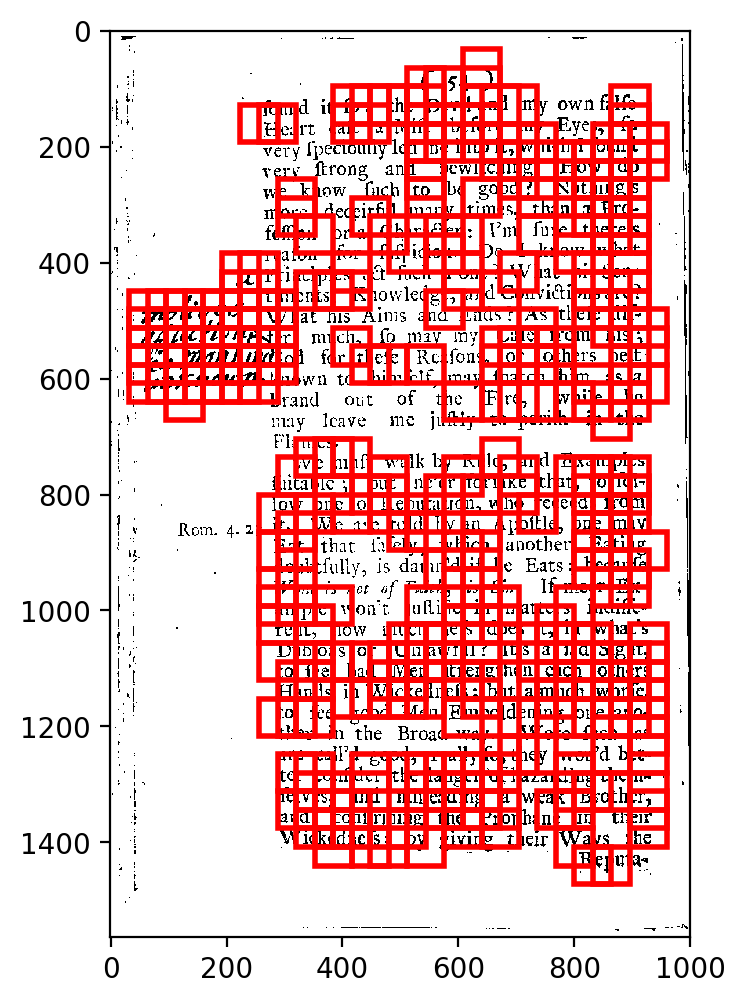

In [16]:

import sys
import os
sys.path.append(os.path.abspath('../../../'))
from detection.lib.model.ImageROI import ImageROI
from PIL import Image
import numpy as np
import torch

# book_data_dir = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images'
# img_loc = book_data_dir + '/Dryden/positive/307.png'
# Testing with image of dimensions 1000x1381

#img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'

#img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Confucius/positive/263.png'
#img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Albin/positive/164.png'
#img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Voltaire/positive/11.png'
img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Defoe/positive/103.png'
#img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Defoe/negative/1981.png'
#img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Ascham/positive/1073.png'
#img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Blackmore/positive/1601.png'


pilimg = Image.open(img_loc)
w, h = pilimg.size
imgrois = [ImageROI(0, 0, w, h)]
imgarr = np.asarray(pilimg)

from model_utils import create_model_architecture
from bounding_box_classification import get_pos_rois
# net1 = Net1()
net1 = create_model_architecture('net1', use_gpu = False)
# net1.load_state_dict(torch.load('models/net1-IAM-1.pt'))
net1.load_state_dict(torch.load('models/net1-aa_64-5000ep.pt'))


# Modify this as necessary
# imgrois = [ImageROI(0, 0, 1000, 700), ImageROI(0, 750, 1000, 500)]
net1.train(False)
with torch.set_grad_enabled(False):
    pos_rois = get_pos_rois(net1,
                            (img_loc, imgrois),
                            model_transform = net1_data_transforms['test'],
                            model_input_size = (64,64),
                            stride=(32, 32))

# for rois in pos_rois:
#     for roi in rois:
#         print(roi.toString())
        
all_rois = [roi for rois in pos_rois for roi in rois]
confs = [roi.confidence for roi in all_rois]



#print(confs)
# import matplotlib.pyplot as plt

# n, bins, patches = plt.hist(confs,908)
# plt.show()
    
# print(bins)





print(len(all_rois))
threshold = -7.58074643e-04
thresholded_rois = [roi for roi in all_rois if roi.confidence >= threshold]
print(len(thresholded_rois))
print(thresholded_rois[0].toString())



from detection.lib.utils.Utils import plt_img
plt_img(imgarr, rois=[(thresholded_rois, 'r')])#, roi_level_set=roi_level_set)





#print('number of pos ROIs found', len(all_rois))

# from detection.lib.ImgProcessor import ImgProcessor
#from detection.lib.utils.Utils import plt_img
# plot the rois and plot only certain information according to the set
# imgProcessor = ImgProcessor()
# img = imgProcessor.loadImage(inFilename=img_loc)
# roi_level_set = set([1])
#plt_img(imgarr, rois=[(all_rois, 'r')])#, roi_level_set=roi_level_set)

In [ ]:
print("done plotting regions of interest")